In [58]:
# Imports 
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline 

plt.style.use('seaborn')

In [59]:
df = pd.read_csv('../data/ign_reviews.csv')
df.head()

,rating,date,comment_count,name,month,year,console,comment_rank,rate_rank
0,9.0,2021-02-17,84,valheim early access,2,2021,unknown,medium,high
1,8.0,2021-02-11,74,ys ix: monstrum nox,2,2021,unknown,medium,medium
2,7.0,2021-02-10,1291,super mario 3d world + bowser’s fury,2,2021,unknown,high,medium
3,8.0,2021-02-09,377,persona 5 strikers,2,2021,unknown,medium,medium
4,7.0,2021-02-09,117,little nightmares 2,2,2021,unknown,medium,medium


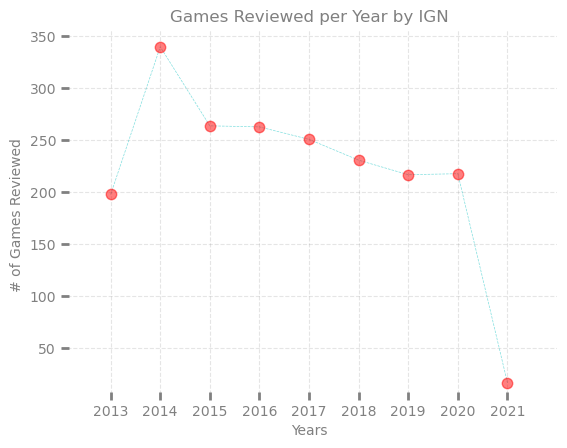

In [169]:
plt.style.use('default')

df[['year', 'rating', 'comment_count']].groupby('year').count().plot(legend = False, 
                                fontsize = 10, style = ['c--','r.'], lw = 0.5, 
                                alpha = 0.5, markersize = 15, xlim = (2012, 2022))


_ = plt.xticks(range(2013, 2022))
_ = plt.xlabel("Years", size = 10, color = 'grey')
_ = plt.ylabel("# of Games Reviewed", size = 10, color = 'grey')

# Remove border 
for spine in plt.gca().spines.values():
    spine.set_visible(False)

_ = plt.title("Games Reviewed per Year by IGN", size = 12, color = 'grey')
_ = plt.grid(color = 'grey', linestyle = '--')
_ = plt.tick_params(direction='in', length=6, width=2, colors='grey',
                   grid_color='gray', grid_alpha=0.2)

# Save image
plt.savefig('../img/game_reviewed.png')

In [ ]:
# Save images 